   Age  Income   Debt Marital_Status Education_Level Credit_Score
0   28  117553  39942         Single             PhD         Poor
1   40  104725  47543        Married             PhD         Poor
2   28  105658  43341        Married          Master         Poor
3   27   91169   8293       Divorced     High School      Average
4   42   50181  21461       Divorced             PhD      Average

Accuracy Score: 0.345

Confusion Matrix:
 [[28 26 17]
 [23 26 20]
 [23 22 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.39      0.39        71
           1       0.35      0.38      0.36        69
           2       0.29      0.25      0.27        60

    accuracy                           0.34       200
   macro avg       0.34      0.34      0.34       200
weighted avg       0.34      0.34      0.34       200



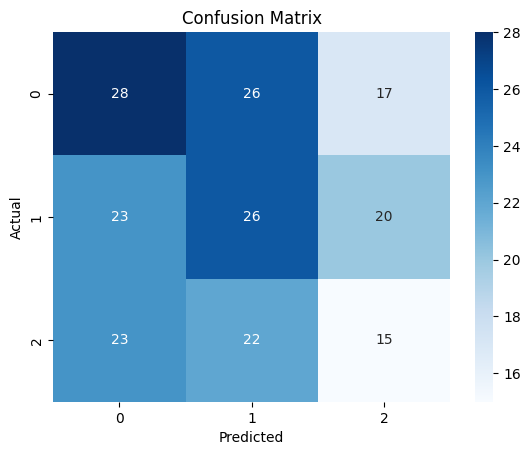

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Sample Data Generation (replace this with real data)
data = {
    'Age': np.random.randint(20, 65, 1000),
    'Income': np.random.randint(30000, 120000, 1000),
    'Debt': np.random.randint(0, 50000, 1000),
    'Marital_Status': np.random.choice(['Single', 'Married', 'Divorced'], 1000),
    'Education_Level': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 1000),
    'Credit_Score': np.random.choice(['Good', 'Average', 'Poor'], 1000)
}

# Create a DataFrame
df = pd.DataFrame(data)

# 🔎 Check the data
print(df.head())

# Encode categorical variables
le = LabelEncoder()
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])  # Target variable

# Split data into features and target
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# ✅ Model Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 🔥 Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
